<a href="https://colab.research.google.com/github/Joydeep75/EDA/blob/master/EDA_iris_CDF_PDF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://medium.com/@rishav.jnit/exploratory-data-analysis-eda-on-iris-dataset-using-python-cadd850c1fc6
# Exploratory data analysis (EDA) on Iris Dataset using Python


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris.shape

(150, 5)

In [0]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [0]:
iris['species'].value_counts()

# Hence a Balanced dataset

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

**1D Scatter plot**

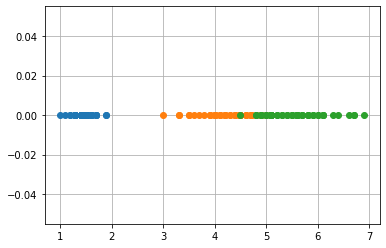

In [0]:
iris_setso = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];

plt.plot(iris_setso["petal_length"],np.zeros_like(iris_setso["petal_length"]), 'o')
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor["petal_length"]), 'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica["petal_length"]), 'o')

plt.grid()
plt.show()

# Observation() | Conclusion
# Green points are Virginica, orange points are Versicolor and blue points are Setosa
# Virginica and Versicolor are overlapping
# 1D Scatter are very hard to read and understand

2D scatter plot

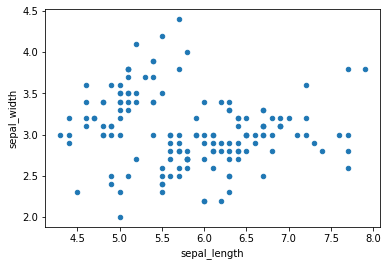

In [0]:
iris.plot(kind="scatter", x= "sepal_length", y= "sepal_width")
plt.show()

# Observation:

# In the above figure, we are plotting sepal length on x-axis and sepal width on y-axis.
# we are scattering all the points that we have and putting it on the plot 
# and it is called a 2D plot because we are using 2 features i.e on x-axis and y-axis.

# In the above figure, we are’t able to understand which is setosa or 
# versicolor or virginica flower because all points are in same colour. 
# It cannot make much sense out it

Plot 2-D Scatter plot with colour for each flower

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


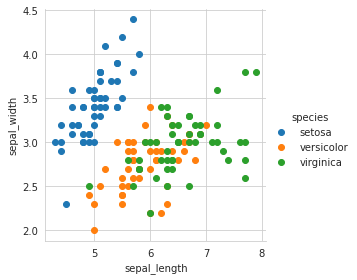

In [0]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="species",size=4) \
    .map(plt.scatter,"sepal_length","sepal_width") \
    .add_legend()
plt.show()

# Observation(s) | Conclusion:

# Blue points can be easily separated from red and green by drawing a line.
# But red and green data points cannot be easily separated.
# Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
# Separating Versicolor from Viginica is much harder as they have considerable overlap.

3D Scatter Plot

In [0]:
import plotly.express as px

fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',color='species')
fig.show()

# Observation:

# Here we are using plotly library for plotting as 
# you can see we have used sepal length on the x-axis, 
# sepal width on the y-axis and petal length on the z-axis.

# A 3D plot will be used for three variables or dimensions. 
# However, what would do if we have more than 3 dimensions 
# or features in our dataset as we humans do have the 
# capability to visualize more than 3 dimensions?

# One solution to this problem is pair plots.

### Pair plots:

In [0]:
# Pair plots:

# A pairs plot allows us to see both distribution of 
# single variables and relationships between two variables.

# For example, let’s say we have four features 
# ‘sepal length’, ‘sepal width’, ‘petal length’ 
# and ‘petal width’ in our iris dataset. 
# In that case, we will have 4C2 plots i.e. 6 unique plots. 

# The pairs in this case will be :

# sepal length, sepal width
# sepal length, petal length
# sepal length, petal width
# sepal width, petal length
# sepal width, petal width
# petal length, petal width

# So, here instead of trying to visualize 
# four dimensions which is not possible. 
# We will look into 6 2D plots and 
# try to understand the 4-dimensional data in the form of a matrix.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



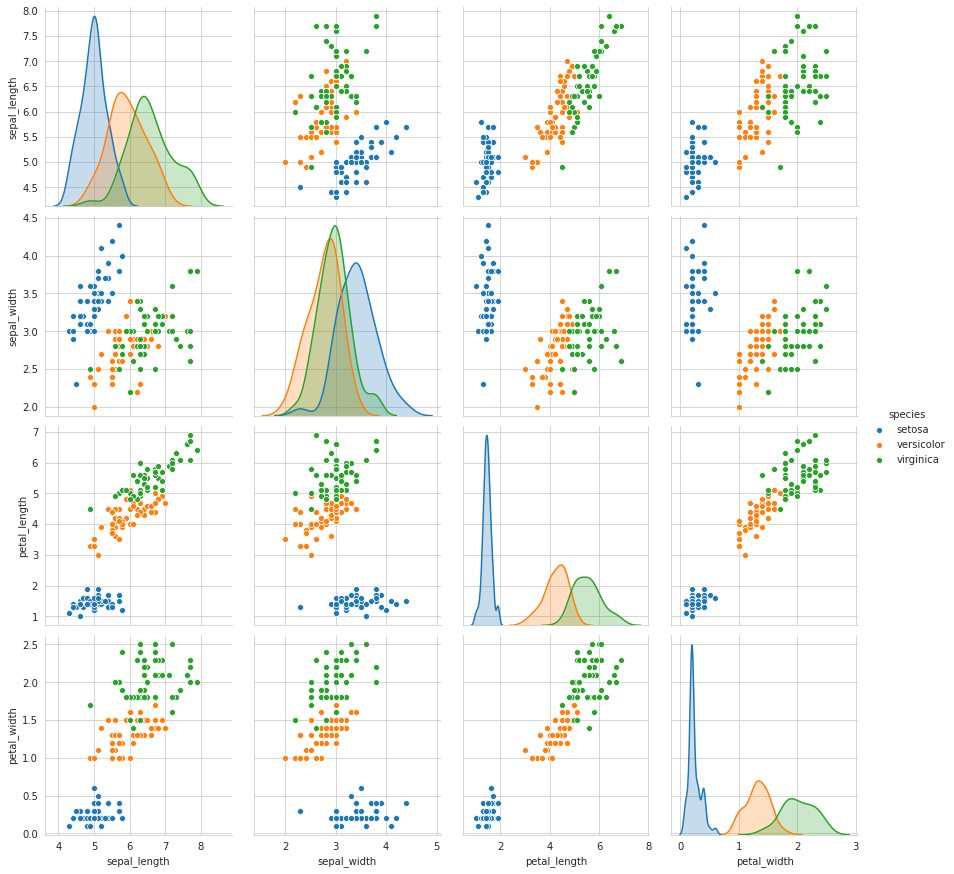

In [0]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="species",size=3);
plt.show()

# As Seen Above, The Pair Plots Can Be Divided Into Three Parts:

# The diagonal plot which showcases the histogram. 
# The histogram allows us to see the PDF/Probability distribution of a 
# single variable
# Upper triangle and lower triangle which shows us the scatter plot.

# The scatter plots show us the relationship between the features. 
# These upper and lower triangles are the mirror image of each other.
# Pair plot will only plot the variables which are numerical. 
# The variables which are of String type, by default pair plot 
# won’t plot automatically. If you want to plot, then you need to 
# encode it as numerical. 

# However, Seaborn will encode internally and 
# assign a label to each unique value in the non-numerical values.

Limitation of Pair plot:-

If you have d features, you will have a pair plot of size dxd cells where each cell is a plot between a pair of features. 
So, pair plots are hard to use when we have high dimensional data. 
For high dimensional data we can use PCA, t-SNE.

Observation(s) | Conclusion:

petal length and petal width are the most useful features to identify various flower types.

While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).

We can find “lines” and “if-else” conditions to build a simple model to classify the flower types.

Histogram and Introduction of PDF (From Wikipedia)

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable). 

To construct a histogram, the first step is to “bin” the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. 

The bins are usually specified as consecutive, non-overlapping intervals of a variable.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



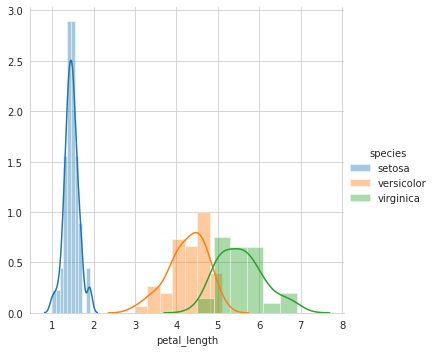

In [0]:
sns.FacetGrid(iris,hue="species",size=5) \
    .map(sns.distplot,"petal_length") \
    .add_legend();
    
plt.show();

# Here in the figure, x-axis is the petal length 
# and the y axis is a count of no of points that 
# exist in the given range. 

# And using this plot we can able to observe 
# how many points are there in particular regions. 
# Histogram basically represents how many points 
# exist for each value on the x-axis.

# PDF is smoothness of histogram